In [1]:
import pandas as pd
import numpy as np
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
from networkx.drawing.layout import bipartite_layout

import matplotlib
import matplotlib.cm as cm

import community as community_louvain

In [2]:
df = pd.read_csv('merge_Olympics_Copy.csv',usecols=['Year','Sport'])
df

Year          Sport
0       1992     Basketball
1       2012           Judo
2       1920       Football
3       1900     Tug-Of-War
4       1988  Speed Skating
...      ...            ...
271111  1976           Luge
271112  2014    Ski Jumping
271113  2014    Ski Jumping
271114  1998      Bobsleigh
271115  2002      Bobsleigh

[271116 rows x 2 columns]

In [3]:
df = df.dropna()
df = df.drop_duplicates()
df

Year          Sport
0       1992     Basketball
1       2012           Judo
2       1920       Football
3       1900     Tug-Of-War
4       1988  Speed Skating
...      ...            ...
63069   1896  Weightlifting
63071   1896      Wrestling
112109  1904  Weightlifting
213142  1932       Alpinism
214105  1936    Aeronautics

[906 rows x 2 columns]

In [4]:
B = nx.Graph()
Games = df['Year']
Sport = df['Sport']
print("Số lần sự kiện", Games.nunique())
print("Số môn thể thao", Sport.nunique())
print("Số cạnh", len(df))


Số lần sự kiện 35
Số môn thể thao 66
Số cạnh 906


In [5]:
#Nhập dữ liệu vào đồ thị 2 phía
B.add_nodes_from(Games,bipartite = 0)
B.add_nodes_from(Sport,bipartite = 1)
for index, row in df.iterrows():
    B.add_edge(row['Year'], row['Sport'],weight =1)

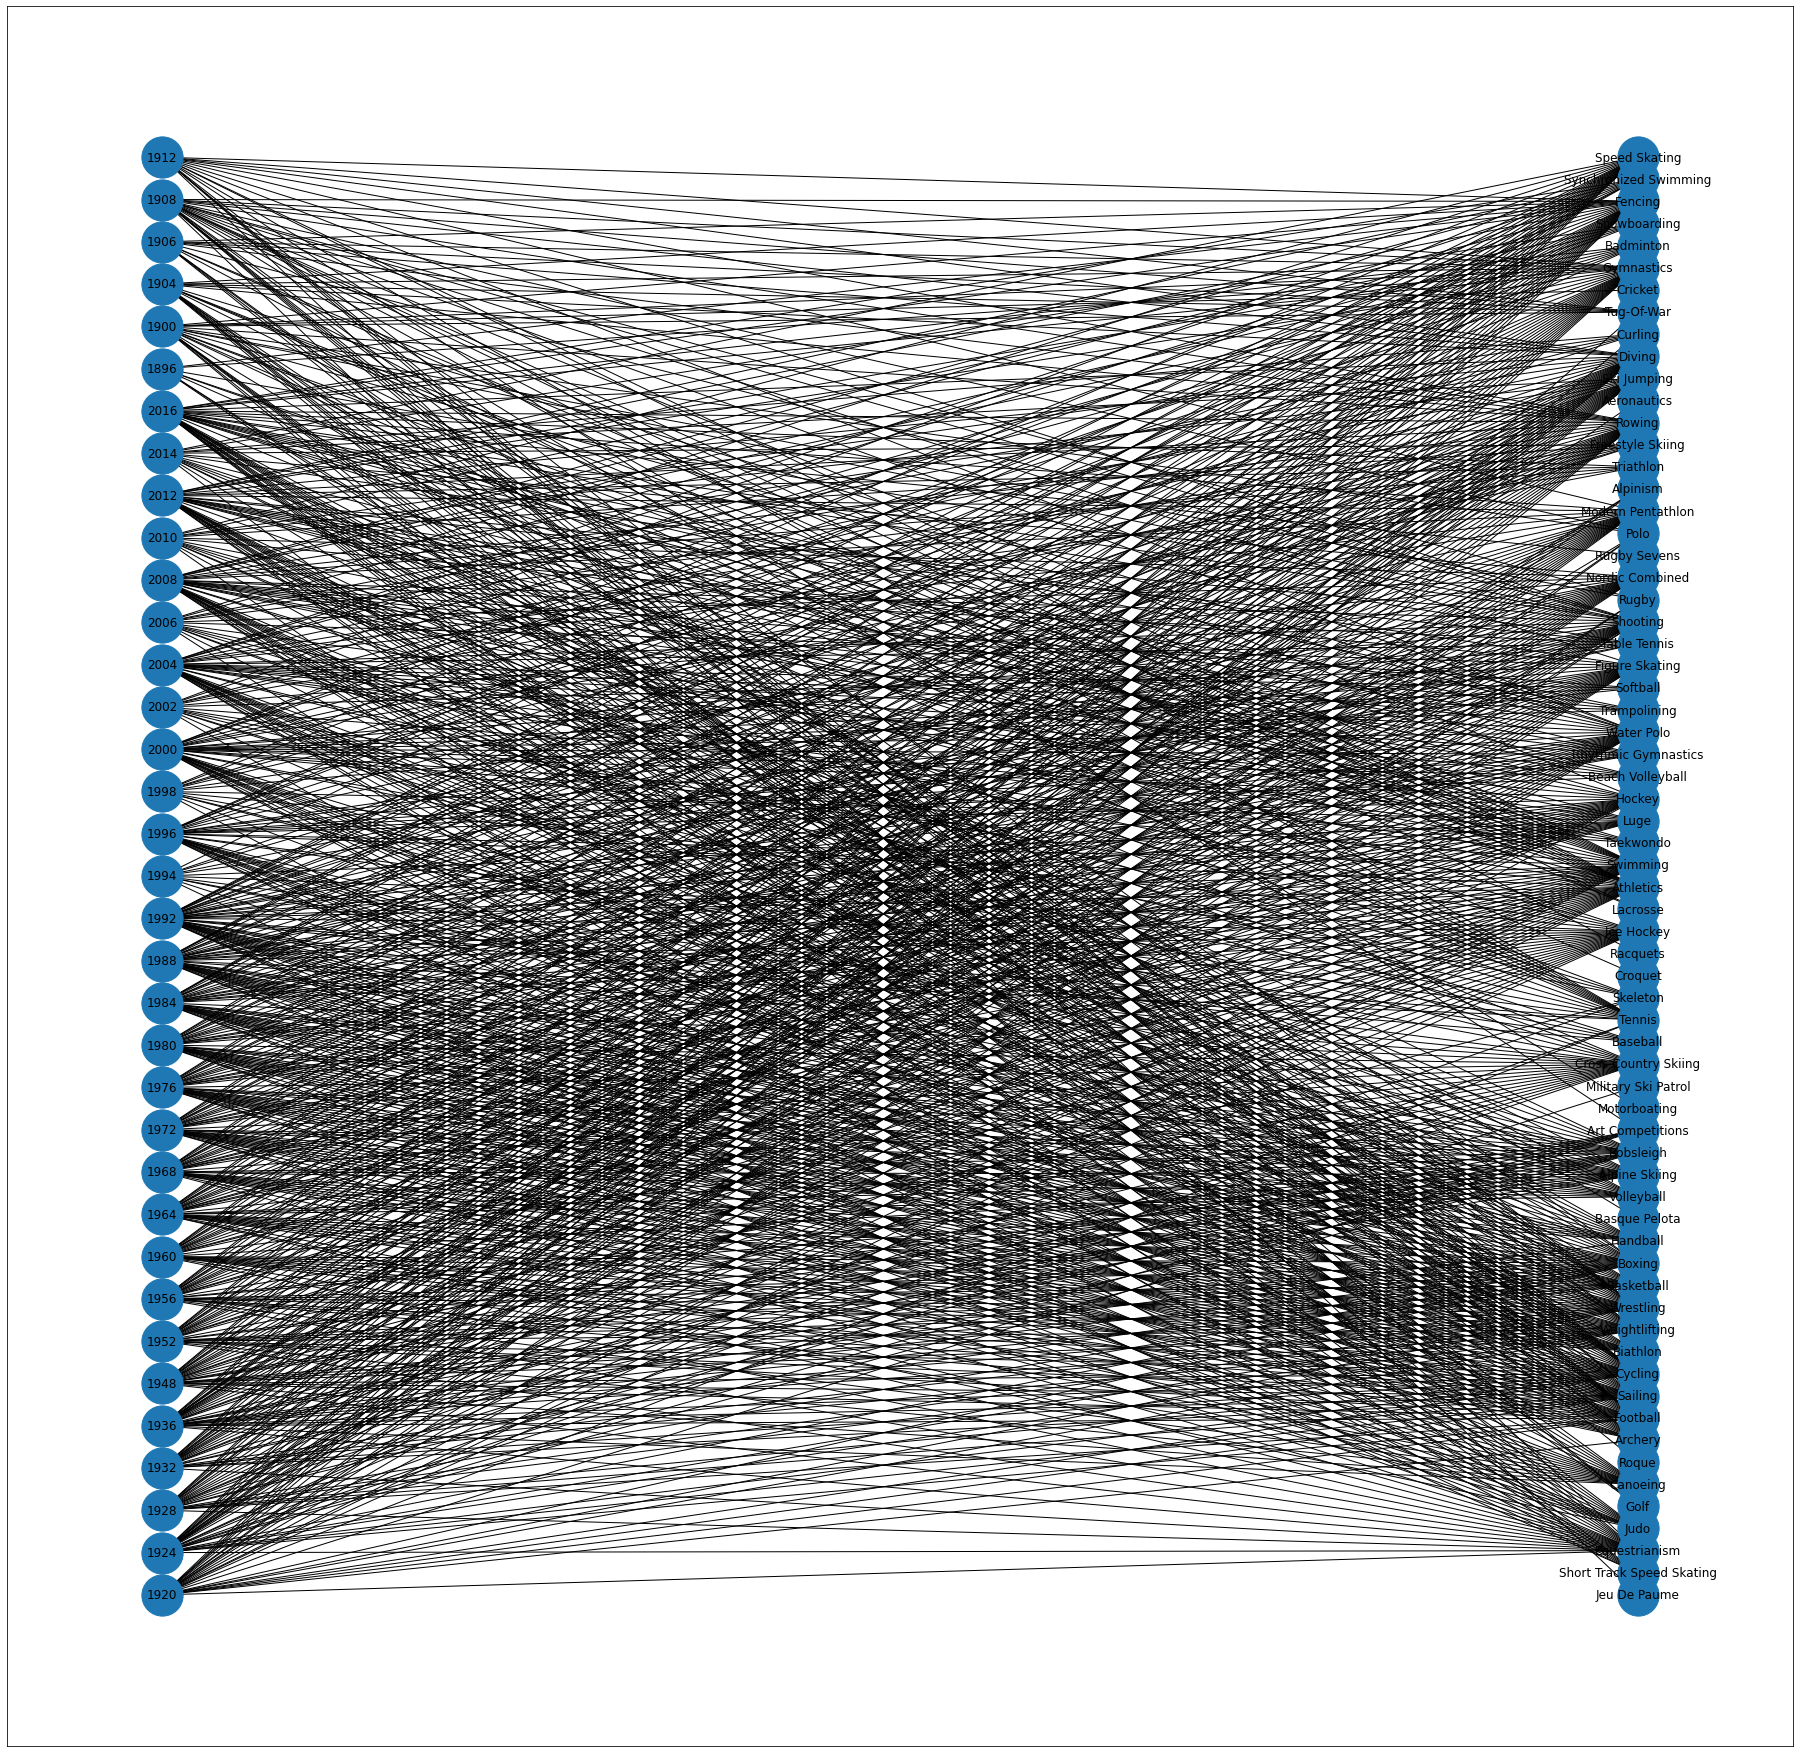

In [6]:
#Hiển thị đồ thị 2 phía
plt.figure(figsize=(32, 32))
pos = bipartite_layout(B,Games)
nx.draw_networkx(B, pos, node_size= 1700, arrowsize=32, font_size=12, with_labels=True, width = 1)
plt.show()

In [7]:
#Chọn giá trị riêng biệt từ dataframe Sport:
Sport_u = Sport.unique()

In [8]:
#Tạo đồ thị G 1 phía từ đồ thị B
G = bipartite.weighted_projected_graph(B, Sport_u)

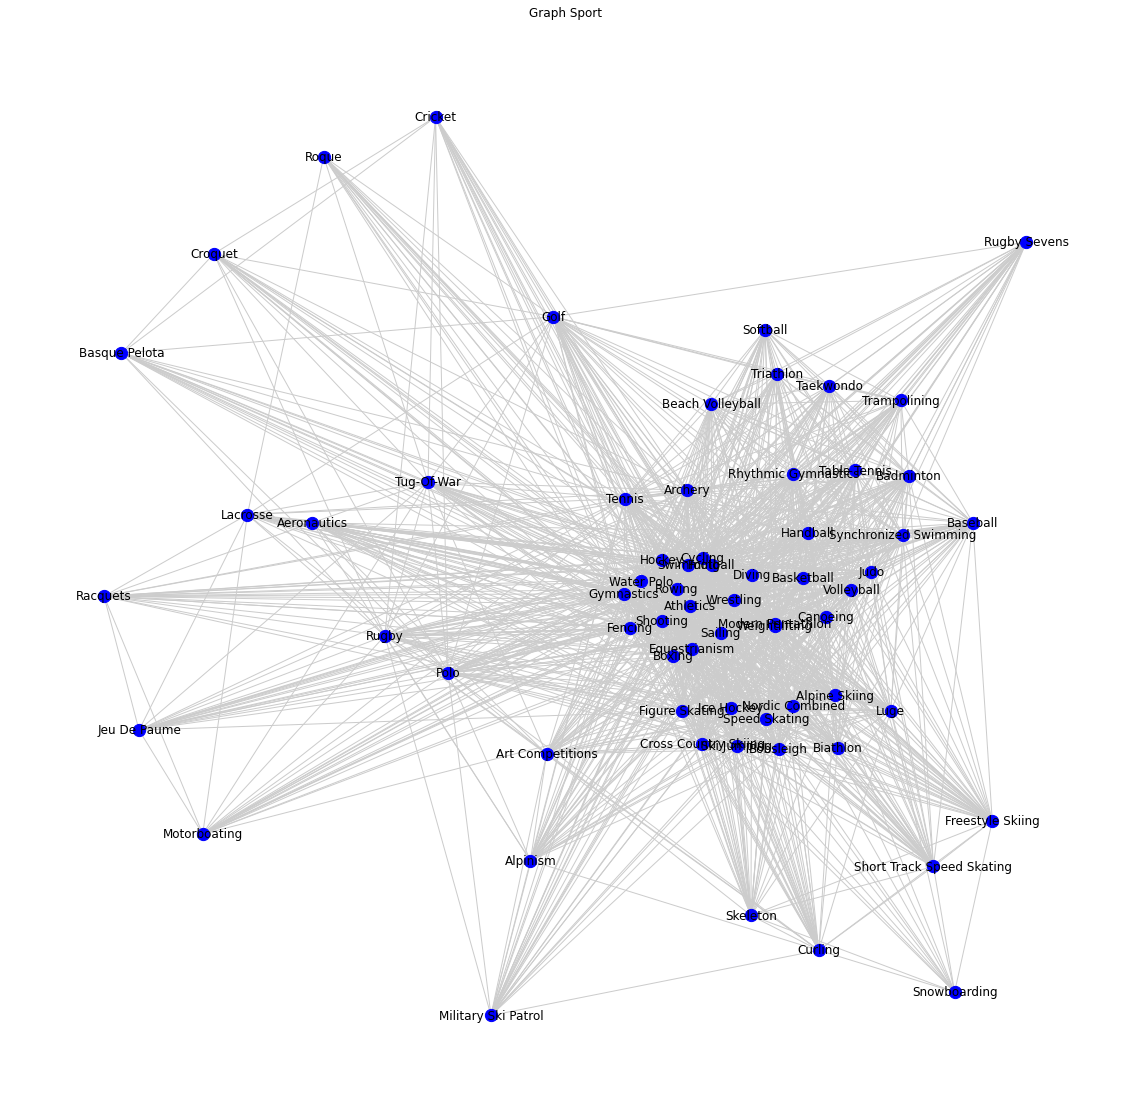

In [9]:
#Hiển thị đồ thị G
plt.figure(figsize=(20, 20))

layout = nx.spring_layout(G)

nx.draw_networkx_nodes(G,
                       layout,
                       nodelist=Sport_u,
                       node_size=150,
                       node_color='blue')
nx.draw_networkx_edges(G,
                       layout,
                       edge_color="#cccccc")
node_labels = dict(zip(Sport_u, Sport_u))
nx.draw_networkx_labels(G,
                        layout,
                        labels=node_labels)
plt.axis('off')
plt.title("Graph Sport")
plt.show()

In [10]:
# Xuất dữ liệu ra file csv
labels = nx.get_edge_attributes(G, 'weight')

df2 =pd.concat([pd.DataFrame([[key[0], key[1], value]],
                columns=['source', 'target', 'weight']) 
                for key, value in labels.items()],
                ignore_index=True)


In [11]:
df2.to_csv (r'olympic_6.csv', index =False, header = True)

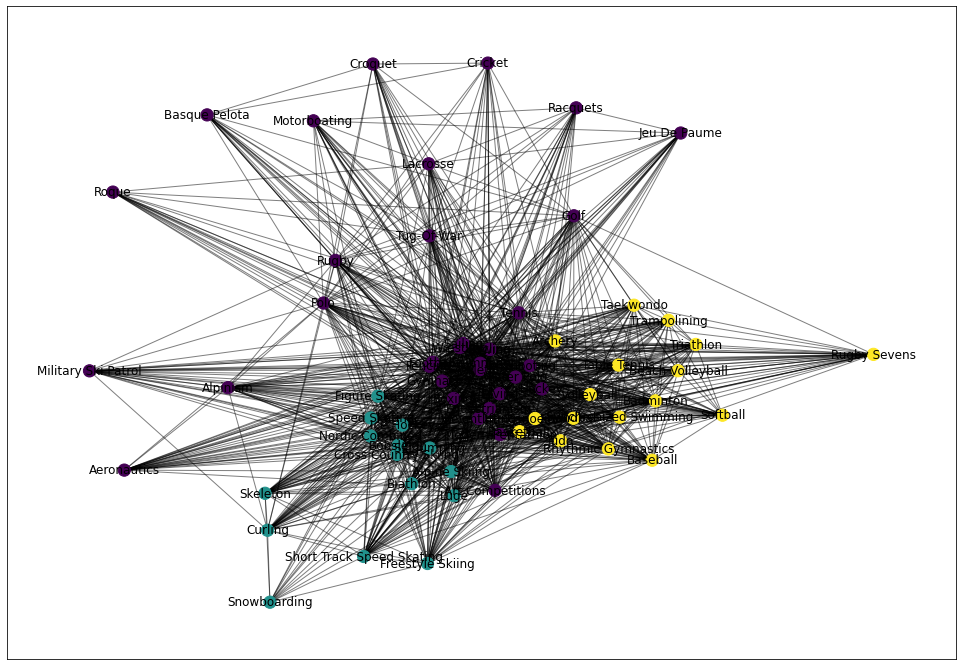

In [12]:
plt.figure(figsize= (17, 12))

#compute the best partition
partition = community_louvain.best_partition(G)

#draw the graph
pos= nx.spring_layout(G)

#color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size= 150,
                       cmap=cmap, node_color= list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha = 0.5)
nx.draw_networkx_labels(G, pos)

plt.show()

In [13]:
values = list(partition.values())

#check number of community have been created
print('Number of comunities', len(np.unique(values)))

Number of comunities 3


In [14]:
for i in range (len(np.unique(values))):
    print ("nhom", i, "************************")
    for name, k in partition.items():
        if k == i:
            print(name)
    print("")


nhom 0 ************************
Football
Tug-Of-War
Athletics
Swimming
Sailing
Gymnastics
Art Competitions
Weightlifting
Wrestling
Water Polo
Hockey
Rowing
Fencing
Equestrianism
Shooting
Boxing
Cycling
Diving
Tennis
Modern Pentathlon
Golf
Rugby
Lacrosse
Polo
Cricket
Racquets
Motorboating
Military Ski Patrol
Croquet
Jeu De Paume
Roque
Alpinism
Basque Pelota
Aeronautics

nhom 1 ************************
Speed Skating
Cross Country Skiing
Ice Hockey
Biathlon
Alpine Skiing
Luge
Bobsleigh
Figure Skating
Nordic Combined
Freestyle Skiing
Ski Jumping
Curling
Snowboarding
Short Track Speed Skating
Skeleton

nhom 2 ************************
Basketball
Judo
Badminton
Handball
Taekwondo
Canoeing
Softball
Archery
Volleyball
Synchronized Swimming
Table Tennis
Baseball
Rhythmic Gymnastics
Rugby Sevens
Trampolining
Beach Volleyball
Triathlon



In [15]:
# Centrality 


In [16]:
close_centrality = nx.closeness_centrality(G)

close_centrality
dict(sorted(close_centrality.items(), key=lambda item: item[1], reverse=True))
#print(close_centrality)

{'Football': 0.9848484848484849,
 'Athletics': 0.9848484848484849,
 'Swimming': 0.9848484848484849,
 'Gymnastics': 0.9848484848484849,
 'Water Polo': 0.9848484848484849,
 'Rowing': 0.9848484848484849,
 'Fencing': 0.9848484848484849,
 'Cycling': 0.9848484848484849,
 'Sailing': 0.9701492537313433,
 'Shooting': 0.9701492537313433,
 'Tennis': 0.9558823529411765,
 'Wrestling': 0.9420289855072463,
 'Boxing': 0.9420289855072463,
 'Diving': 0.9420289855072463,
 'Equestrianism': 0.9154929577464789,
 'Archery': 0.9154929577464789,
 'Weightlifting': 0.9027777777777778,
 'Hockey': 0.9027777777777778,
 'Modern Pentathlon': 0.8783783783783784,
 'Figure Skating': 0.8552631578947368,
 'Basketball': 0.8333333333333334,
 'Canoeing': 0.8333333333333334,
 'Handball': 0.8227848101265823,
 'Ice Hockey': 0.8125,
 'Speed Skating': 0.8024691358024691,
 'Cross Country Skiing': 0.8024691358024691,
 'Bobsleigh': 0.8024691358024691,
 'Nordic Combined': 0.8024691358024691,
 'Ski Jumping': 0.8024691358024691,
 'Judo

In [17]:
node_bet_centrality = nx.betweenness_centrality(G, normalized = True, 
                                              endpoints = False)
node_bet_centrality
dict(
    sorted(node_bet_centrality.items(), key=lambda item: item[1], reverse=True)
    )
#print(node_bet_centrality)

{'Football': 0.015425941193120967,
 'Athletics': 0.015425941193120967,
 'Swimming': 0.015425941193120967,
 'Gymnastics': 0.015425941193120967,
 'Water Polo': 0.015425941193120967,
 'Rowing': 0.015425941193120967,
 'Fencing': 0.015425941193120967,
 'Cycling': 0.015425941193120967,
 'Tennis': 0.013924438705138716,
 'Sailing': 0.013827724058634036,
 'Shooting': 0.013827724058634036,
 'Archery': 0.011837266078527567,
 'Wrestling': 0.010814127196408783,
 'Boxing': 0.010814127196408783,
 'Diving': 0.010814127196408783,
 'Equestrianism': 0.009518207063116657,
 'Figure Skating': 0.009490826658291315,
 'Hockey': 0.008102926402061303,
 'Weightlifting': 0.007678414788976175,
 'Modern Pentathlon': 0.005405191143327547,
 'Polo': 0.00527277902231857,
 'Ice Hockey': 0.00440796747333405,
 'Golf': 0.003976578315246131,
 'Rugby': 0.0038083795315736624,
 'Speed Skating': 0.003618330415257552,
 'Cross Country Skiing': 0.003618330415257552,
 'Bobsleigh': 0.003618330415257552,
 'Nordic Combined': 0.00361833

In [18]:
edge_bet_centrality = nx.edge_betweenness_centrality(G, normalized = True)

dict(
    sorted(edge_bet_centrality.items(), key=lambda item: item[1], reverse=True)
    )
#print(edge_bet_centrality)

{('Figure Skating', 'Snowboarding'): 0.004315307321766587,
 ('Ice Hockey', 'Snowboarding'): 0.0024469375962540064,
 ('Speed Skating', 'Snowboarding'): 0.002203205859015776,
 ('Cross Country Skiing', 'Snowboarding'): 0.002203205859015776,
 ('Bobsleigh', 'Snowboarding'): 0.002203205859015776,
 ('Nordic Combined', 'Snowboarding'): 0.002203205859015775,
 ('Ski Jumping', 'Snowboarding'): 0.002203205859015775,
 ('Alpine Skiing', 'Snowboarding'): 0.0020784028121348065,
 ('Football', 'Roque'): 0.0020159867784302183,
 ('Athletics', 'Roque'): 0.0020159867784302183,
 ('Swimming', 'Roque'): 0.0020159867784302183,
 ('Gymnastics', 'Roque'): 0.0020159867784302183,
 ('Water Polo', 'Roque'): 0.0020159867784302183,
 ('Rowing', 'Roque'): 0.0020159867784302183,
 ('Fencing', 'Roque'): 0.0020159867784302183,
 ('Cycling', 'Roque'): 0.0020159867784302183,
 ('Football', 'Basque Pelota'): 0.001956887818673093,
 ('Football', 'Croquet'): 0.001956887818673093,
 ('Athletics', 'Basque Pelota'): 0.001956887818673093,

In [19]:
p_r = nx.pagerank(G, alpha = 0.85)
p_r 
# 0.85 
dict(sorted(p_r.items(), key=lambda item: item[1], reverse=True))


{'Athletics': 0.029362989017677227,
 'Swimming': 0.029362989017677227,
 'Gymnastics': 0.029362989017677227,
 'Fencing': 0.029362989017677227,
 'Cycling': 0.029362989017677227,
 'Rowing': 0.02910663806899079,
 'Water Polo': 0.028703386357959982,
 'Wrestling': 0.02833831385411539,
 'Football': 0.02831851992816799,
 'Diving': 0.028081731920881817,
 'Sailing': 0.0279442624425286,
 'Shooting': 0.027820213149277705,
 'Boxing': 0.027140652610322617,
 'Equestrianism': 0.0268318099520216,
 'Weightlifting': 0.026688340184774166,
 'Modern Pentathlon': 0.02580633461635921,
 'Hockey': 0.025307952694760903,
 'Figure Skating': 0.022839442862625587,
 'Basketball': 0.021789765418080472,
 'Canoeing': 0.021789765418080472,
 'Ice Hockey': 0.02172816206745055,
 'Speed Skating': 0.020894144631536826,
 'Cross Country Skiing': 0.020894144631536826,
 'Nordic Combined': 0.02089414463153682,
 'Ski Jumping': 0.02089414463153682,
 'Bobsleigh': 0.02006865344382612,
 'Archery': 0.019175046787606127,
 'Alpine Skiing'

In [20]:
eigen_v = nx.eigenvector_centrality(G)

dict(sorted(eigen_v.items(), key=lambda item: item[1], reverse=True))

{'Football': 0.15609071697917656,
 'Athletics': 0.15609071697917656,
 'Swimming': 0.15609071697917656,
 'Gymnastics': 0.15609071697917656,
 'Water Polo': 0.15609071697917656,
 'Rowing': 0.15609071697917656,
 'Fencing': 0.15609071697917656,
 'Cycling': 0.15609071697917656,
 'Sailing': 0.15510215639091043,
 'Shooting': 0.15510215639091043,
 'Wrestling': 0.15300193904604958,
 'Boxing': 0.15300193904604958,
 'Diving': 0.15300193904604958,
 'Tennis': 0.1523726645180069,
 'Equestrianism': 0.1499049535222353,
 'Weightlifting': 0.14919555460498138,
 'Hockey': 0.14838642507914662,
 'Modern Pentathlon': 0.14681617558910834,
 'Archery': 0.14676637516365795,
 'Basketball': 0.13949636972766827,
 'Canoeing': 0.13949636972766827,
 'Figure Skating': 0.1389377552824531,
 'Handball': 0.13758328867206684,
 'Ice Hockey': 0.1337405524137779,
 'Bobsleigh': 0.1320728639564071,
 'Nordic Combined': 0.1320728639564071,
 'Ski Jumping': 0.1320728639564071,
 'Speed Skating': 0.13207286395640708,
 'Cross Country Sk

In [21]:
L = nx.normalized_laplacian_matrix(G)
e = np.linalg.eigvals(L.toarray())
e


<class 'networkx.utils.decorators.argmap'> compilation 28:4: FutureWarning: normalized_laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


array([0.        , 0.63862257, 0.7665327 , 0.85336145, 0.87974369,
       0.93453657, 0.94941654, 0.98417137, 0.99097179, 0.99191507,
       1.06581502, 1.00829457, 1.01494995, 1.05833333, 1.01908419,
       1.05233387, 1.02078953, 1.04931716, 1.02336593, 1.04671952,
       1.02449298, 1.05263158, 1.05263158, 1.02700614, 1.0431233 ,
       1.04212594, 1.02798857, 1.02843974, 1.028483  , 1.04052092,
       1.04009735, 1.02960898, 1.03032692, 1.03052412, 1.03193277,
       1.03199641, 1.03851633, 1.03317   , 1.03777676, 1.03363746,
       1.03386044, 1.03412069, 1.03441796, 1.03481024, 1.0349385 ,
       1.03700669, 1.03681544, 1.03636278, 1.03613351, 1.03542892,
       1.03556945, 1.03566502, 1.03955998, 1.03927771, 1.02970297,
       1.04347826, 1.04347826, 1.03067485, 1.03067485, 1.03666245,
       1.03935599, 1.03935599, 1.03935599, 1.03666245, 1.03666245,
       1.03666245])

In [22]:
# T = G.copy()

In [23]:
# from random import sample
from random import sample
# #random sample 3 nodes from the graph
# random_nodes = sample(list(G.nodes()), len(T)-10)
# for x in random_nodes:
#     T.remove_node(x)

Số cạnh  18


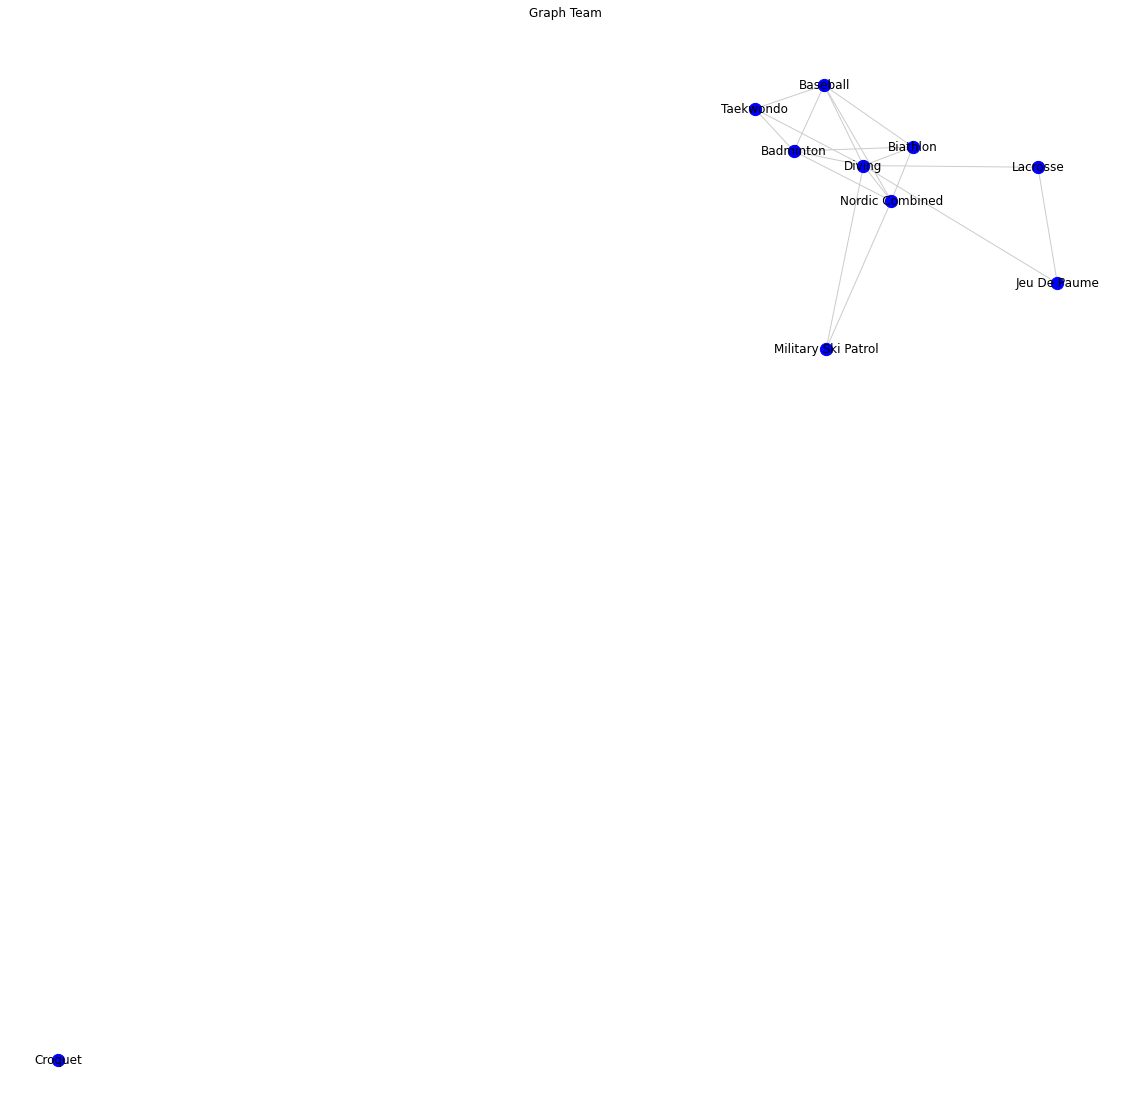

In [24]:
#random 10 node có số cạnh nhỏ hơn hoặc bằng 20 cho dễ tính toán
inr = 30
while inr > 20:
    T = G.copy()

    #random ngẫu nhiên 10 node trong đồ thị
    #sample(list(G.nodes()), len(T)-k) với k là số node cần khởi tạo
    random_nodes = sample(list(G.nodes()), len(T)-10)
    for x in random_nodes:
        T.remove_node(x)
    inr = T.number_of_edges()

plt.figure(figsize=(20, 20))

layout = nx.spring_layout(T)
inr = T.number_of_edges()
print("Số cạnh ", inr)
nx.draw_networkx_nodes(T,
                       layout,
                       nodelist=T.nodes(),
                       node_size=150,
                       node_color='blue')
nx.draw_networkx_edges(T,
                       layout,
                       edge_color="#cccccc")
node_labels = dict(zip(T.nodes(), T.nodes()))
nx.draw_networkx_labels(T,
                        layout,
                        labels=node_labels)
plt.axis('off')
plt.title("Graph Team")
plt.show()

In [25]:
labels = nx.get_edge_attributes(T, 'weight')

df2 =pd.concat([pd.DataFrame([[key[0], key[1], value]],
                columns=['source', 'target', 'weight']) for key, value in labels.items()],
                ignore_index=True)
df2.to_csv (r'olympic_5.csv', index =False, header = True)

In [26]:
n =nx.to_numpy_array(T, weight='weight')
n

array([[ 0.,  1.,  5.,  7.,  1.,  5.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  9., 15.,  1.,  0.,  0.,  0.,  0.],
       [ 5.,  0.,  0.,  5.,  0.,  3.,  0.,  0.,  0.,  0.],
       [ 7.,  9.,  5.,  0., 16.,  5.,  2.,  1.,  0.,  1.],
       [ 1., 15.,  0., 16.,  0.,  1.,  0.,  1.,  0.,  0.],
       [ 5.,  1.,  3.,  5.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.]])

In [27]:

new_m = pd.DataFrame(n)
print(new_m)
new_m.to_csv (r'test3.csv')

     0     1    2     3     4    5    6    7    8    9
0  0.0   1.0  5.0   7.0   1.0  5.0  0.0  0.0  0.0  0.0
1  1.0   0.0  0.0   9.0  15.0  1.0  0.0  0.0  0.0  0.0
2  5.0   0.0  0.0   5.0   0.0  3.0  0.0  0.0  0.0  0.0
3  7.0   9.0  5.0   0.0  16.0  5.0  2.0  1.0  0.0  1.0
4  1.0  15.0  0.0  16.0   0.0  1.0  0.0  1.0  0.0  0.0
5  5.0   1.0  3.0   5.0   1.0  0.0  0.0  0.0  0.0  0.0
6  0.0   0.0  0.0   2.0   0.0  0.0  0.0  0.0  0.0  1.0
7  0.0   0.0  0.0   1.0   1.0  0.0  0.0  0.0  0.0  0.0
8  0.0   0.0  0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0
9  0.0   0.0  0.0   1.0   0.0  0.0  1.0  0.0  0.0  0.0


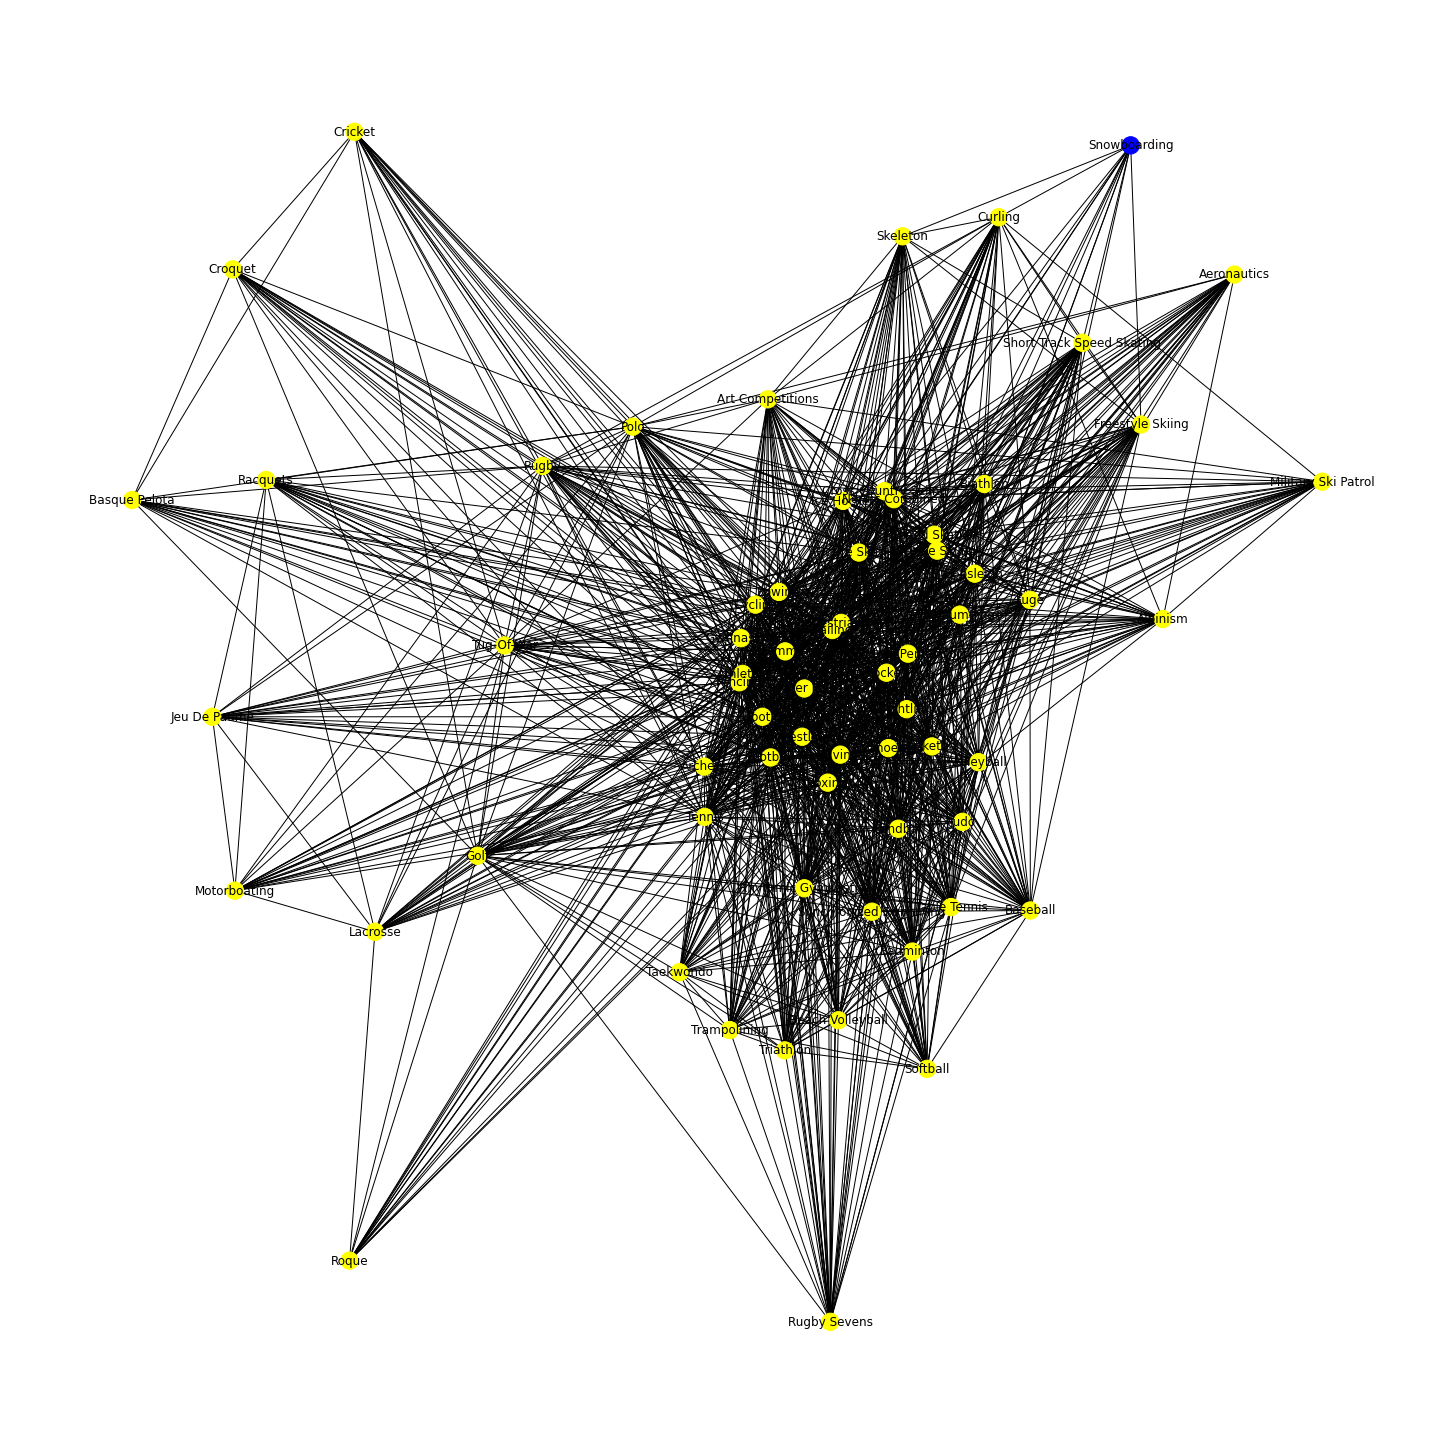

In [28]:
from networkx.algorithms.community.centrality import girvan_newman
#Sao chép đồ thị G 
U = G.copy()

#Thực thi girvan_newman
communities = girvan_newman(U)

node_groups = []
for com in next(communities):
  node_groups.append(list(com))

#Vẽ đồ thị
plt.figure(figsize=(20, 20))
color_map = []
for node in U:
    if node in node_groups[0]:
        color_map.append('yellow')
    else: 
        color_map.append('blue')  
nx.draw(G, node_color=color_map, with_labels=True)
plt.show()

In [29]:
#Phân cụm
print(node_groups)

[['Jeu De Paume', 'Equestrianism', 'Short Track Speed Skating', 'Judo', 'Golf', 'Canoeing', 'Roque', 'Archery', 'Football', 'Sailing', 'Cycling', 'Biathlon', 'Weightlifting', 'Wrestling', 'Basketball', 'Boxing', 'Handball', 'Basque Pelota', 'Volleyball', 'Bobsleigh', 'Art Competitions', 'Alpine Skiing', 'Military Ski Patrol', 'Motorboating', 'Cross Country Skiing', 'Tennis', 'Skeleton', 'Baseball', 'Croquet', 'Lacrosse', 'Ice Hockey', 'Racquets', 'Athletics', 'Swimming', 'Hockey', 'Luge', 'Beach Volleyball', 'Taekwondo', 'Rhythmic Gymnastics', 'Water Polo', 'Trampolining', 'Softball', 'Figure Skating', 'Table Tennis', 'Shooting', 'Rugby', 'Nordic Combined', 'Rugby Sevens', 'Modern Pentathlon', 'Polo', 'Alpinism', 'Triathlon', 'Freestyle Skiing', 'Rowing', 'Aeronautics', 'Ski Jumping', 'Diving', 'Curling', 'Tug-Of-War', 'Cricket', 'Gymnastics', 'Badminton', 'Fencing', 'Synchronized Swimming', 'Speed Skating'], ['Snowboarding']]


In [30]:
#Kmeans
from sklearn import preprocessing
from sklearn.cluster import KMeans
k = preprocessing.LabelEncoder()
df3 = df.copy()

In [31]:
k.fit(df3['Year'])
df3['Yearnum'] = k.transform(df3['Year']) 
df3['Yearnum'].drop_duplicates()

0       22
1       32
2        6
3        1
4       21
8       23
26       9
28      27
29      12
30      19
31      26
32      24
35       5
39       7
40      33
41      11
68      25
77      29
79      30
80      34
82      28
83      14
85      15
87      20
89      16
90      17
94      10
111     13
133      8
145     18
245     31
268      3
711      2
1149     4
3079     0
Name: Yearnum, dtype: int64

In [32]:

k.fit(df3['Sport'])
df3['Sportnum'] = k.transform(df3['Sport']) 
df3['Sportnum'].drop_duplicates()

0          8
1         32
2         24
3         61
4         53
          ..
21488     31
29994     42
30323      2
50275      9
214105     0
Name: Sportnum, Length: 66, dtype: int32

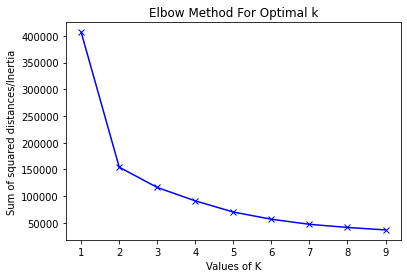

In [33]:

from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(df3[['Yearnum','Sportnum']])
 Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

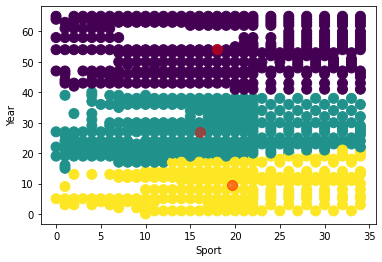

Toạ độ trung tâm cụm:  [[18.01470588 54.10588235]
 [16.12979351 26.85250737]
 [19.70044053  9.55506608]]


In [34]:
algorithm = KMeans(n_clusters = 3 ,init='random' )
algorithm.fit(df3[['Yearnum','Sportnum']])
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_ #Gán toạ độ trung tâm cụm
plt.clf()
plt.scatter( x = 'Yearnum' ,y = 'Sportnum' , data = df3[['Yearnum','Sportnum']] , c = labels2 , s = 100 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 100 , c = 'red' , alpha = 0.5)
plt.ylabel('Year') , plt.xlabel('Sport')
plt.show()
print('Toạ độ trung tâm cụm: ',centroids2)

In [35]:
noteGenre = df3.drop_duplicates(subset='Year', keep="last")
print('STT: ',len(noteGenre[['Year','Yearnum']]))
print(noteGenre[['Year','Yearnum']].to_string())

STT:  35
        Year  Yearnum
4107    2016       34
4913    1994       23
6419    2006       29
6935    1912        5
7358    1998       25
8919    1968       16
10058   1976       18
12363   1984       20
12790   1980       19
13028   1972       17
13116   1988       21
13422   1992       22
14488   2002       27
14576   1964       15
15129   1996       24
15644   1948       11
16147   2014       33
20358   1928        8
20388   2010       31
22872   1920        6
23036   2008       30
23891   1952       12
24772   1956       13
26216   1906        3
27067   2000       26
30323   1924        7
31324   1908        4
32446   2012       32
34787   2004       28
46055   1960       14
50275   1900        1
63071   1896        0
112109  1904        2
213142  1932        9
214105  1936       10


In [36]:
noteCategory = df3.drop_duplicates(subset='Sport', keep="last")
print('Số thể loại: ',len(noteCategory[['Sport','Sportnum']]))
print(noteCategory[['Sport','Sportnum']].to_string())

Số thể loại:  66
                            Sport  Sportnum
612                     Taekwondo        57
769                  Rugby Sevens        45
2247                         Golf        26
2680                   Basketball         8
2728                     Handball        28
2799                     Baseball         7
3448                 Table Tennis        56
4835          Rhythmic Gymnastics        41
5285                     Lacrosse        33
5332                Alpine Skiing         1
5574             Beach Volleyball        10
6244        Synchronized Swimming        55
6437                     Softball        52
6440                   Volleyball        62
6491                     Canoeing        14
6688                    Badminton         6
6817                 Snowboarding        51
6892                      Cricket        15
7181             Freestyle Skiing        25
7348                    Athletics         5
7353                     Swimming        54
7793         Cr

In [37]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df3[['Yearnum', 'Sportnum' ]])
df3['cluster']= y_predicted
df3

Year          Sport  Yearnum  Sportnum  cluster
0       1992     Basketball       22         8        0
1       2012           Judo       32        32        2
2       1920       Football        6        24        2
3       1900     Tug-Of-War        1        61        1
4       1988  Speed Skating       21        53        1
...      ...            ...      ...       ...      ...
63069   1896  Weightlifting        0        64        1
63071   1896      Wrestling        0        65        1
112109  1904  Weightlifting        2        64        1
213142  1932       Alpinism        9         2        0
214105  1936    Aeronautics       10         0        0

[906 rows x 5 columns]

In [38]:
df_1= df3[df3.cluster == 0]
df_2= df3[df3.cluster == 1]
df_3= df3[df3.cluster == 2]
df_1.to_csv(r'Kmeans_1.csv',index=False,header=True)
df_2.to_csv(r'Kmeans_2.csv',index=False,header=True)
df_3.to_csv(r'Kmeans_3.csv',index=False,header=True)

PermissionError: [Errno 13] Permission denied: 'Kmeans_1.csv'